In [3]:
def get_passK(k=1,fileName='./result_calme.jsonl'):
    import json
    num=0
    total=0
    with open(fileName,'r') as f:
        for line in f:
            total+=1
            json_line=json.loads(line)
            if json_line['eval']=="PASS":
                if 'attempt' in json_line and json_line['attempt']<=k:
                    num+=1
                elif 'rollout' in json_line and json_line['rollout']<=k:
                    num+=1
    return num/total,num


def get_passK_human_checked(k=1,fileName='',checked_file=""):
    import json
    checked=[]
    with open(checked_file,'r') as f:
        for line in f.readlines():
            items=line.strip().split(",")
            if items[1]=="True":
                checked.append(items[0].strip().lower())
    num=0
    total=0
    with open(fileName,'r') as f:
        for line in f:
            total+=1
            json_line=json.loads(line)
            if json_line['eval']=="PASS":
                if 'attempt' in json_line and json_line['attempt']<=k and (json_line["project"]+"_"+str(json_line["bug_id"])).lower() in checked:
                    num+=1
                elif 'rollout' in json_line and json_line['rollout']<=k and (json_line["project"]+"_"+str(json_line["bug_id"])).lower() in checked:
                    num+=1
    return num/total,num

print(get_passK_human_checked(1,'./mcts_gpt_4o_mini_16_rollout.jsonl','./manual_mcts_gpt4o_mini.txt'))

(0.13963039014373715, 68)


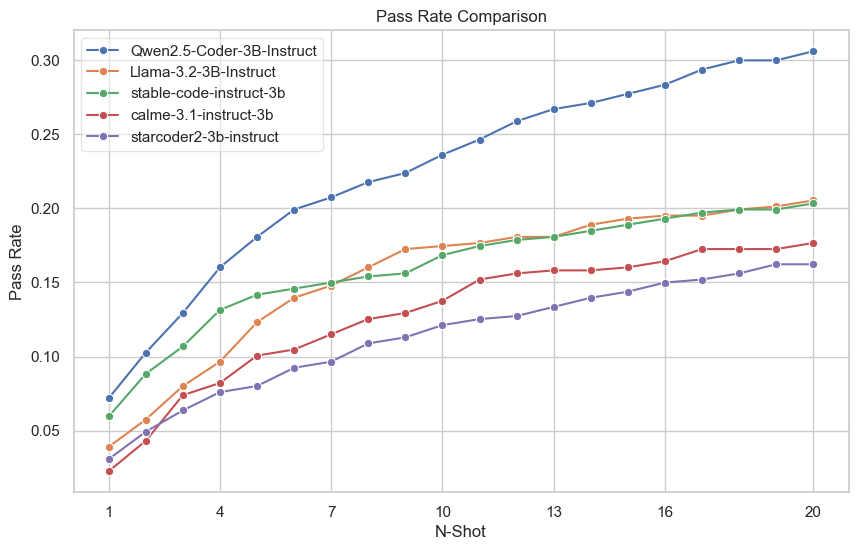

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 21)
y1 = [get_passK(i, './result_qwen_3b.jsonl')[0] for i in x]
y2 = [get_passK(i, './result_llama_3.2_3b.jsonl')[0] for i in x]
y3 = [get_passK(i, './result_stable.jsonl')[0] for i in x]
y4 = [get_passK(i, './result_calme.jsonl')[0] for i in x]
y5 = [get_passK(i, './result_starcoder.jsonl')[0] for i in x]

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'N-Shot': list(x) * 5,
    'Pass Rate': y1 + y2 + y3 + y4 + y5,
    'Model': ['Qwen2.5-Coder-3B-Instruct'] * len(y1) +
             ['Llama-3.2-3B-Instruct'] * len(y2) +
             ['stable-code-instruct-3b'] * len(y3) +
             ['calme-3.1-instruct-3b'] * len(y4) +
             ['starcoder2-3b-instruct'] * len(y5)
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='N-Shot', y='Pass Rate', hue='Model', marker='o')

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16, 20])

# 添加标题和标签
plt.title('Pass Rate Comparison')
plt.xlabel('N-Shot')
plt.ylabel('Pass Rate')

# 显示图例
plt.legend(loc='best', framealpha=0.5)

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-3b.pdf")

# 显示图形
plt.show()


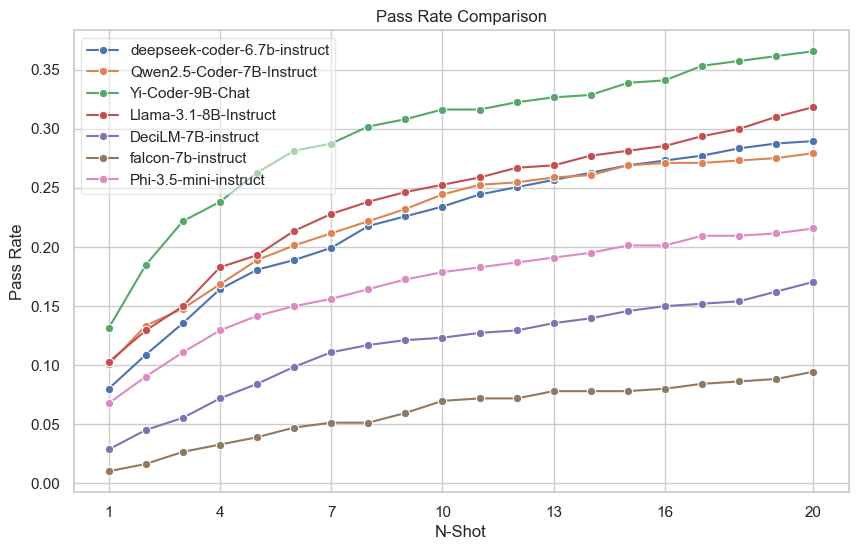

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 21)
y1 = [get_passK(i, './result_dscoder.jsonl')[0] for i in x]
y2 = [get_passK(i, './result_qwen_7b.jsonl')[0] for i in x]
y3 = [get_passK(i, './result_yi.jsonl')[0] for i in x]
y4 = [get_passK(i, './result_llama.jsonl')[0] for i in x]
y5 = [get_passK(i, './result_deci.jsonl')[0] for i in x]
y6 = [get_passK(i, './result_falcon.jsonl')[0] for i in x]
y7 = [get_passK(i, './result_phi.jsonl')[0] for i in x]

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'N-Shot': list(x) * 7,
    'Pass Rate': y1 + y2 + y3 + y4 + y5 + y6 + y7,
    'Model': ['deepseek-coder-6.7b-instruct'] * len(y1) +
             ['Qwen2.5-Coder-7B-Instruct'] * len(y2) +
             ['Yi-Coder-9B-Chat'] * len(y3) +
             ['Llama-3.1-8B-Instruct'] * len(y4) +
             ['DeciLM-7B-instruct'] * len(y5) +
             ['falcon-7b-instruct'] * len(y6) +
             ['Phi-3.5-mini-instruct'] * len(y7)
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='N-Shot', y='Pass Rate', hue='Model', marker='o')

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16, 20])

# 添加标题和标签
plt.title('Pass Rate Comparison')
plt.xlabel('N-Shot')
plt.ylabel('Pass Rate')

# 显示图例
plt.legend(loc='best', framealpha=0.5)

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-7b.pdf")

# 显示图形
plt.show()


[67, 88, 97, 105, 106, 111, 114, 115, 120, 121, 122, 123, 124, 125, 127, 128]
[65, 80, 90, 101, 104, 107, 113, 117, 119, 120, 122, 126, 129, 129, 129, 131]
[68, 104, 120, 127, 133, 136, 141, 147, 150, 152, 152, 155, 156, 156, 157, 158]


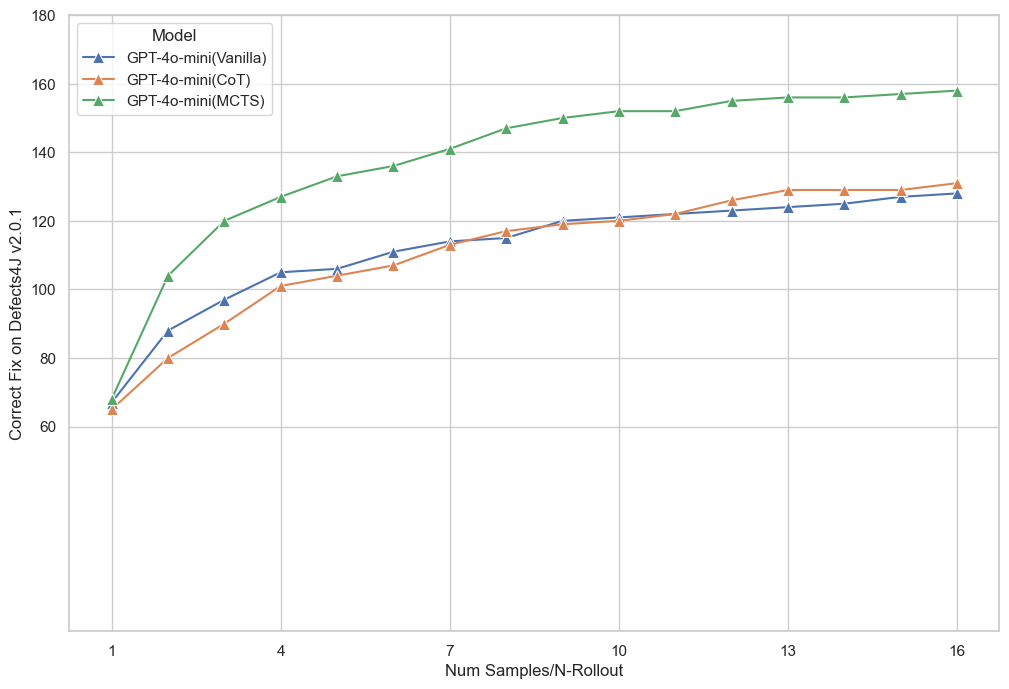

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1 = [get_passK(i, './result_gpt_4o_mini.jsonl')[1] for i in x]
y2 = [get_passK(i, './mcts_gpt_4o_mini_16_rollout.jsonl')[1] for i in x]
y1_checked = [get_passK_human_checked(i, './result_gpt_4o_mini.jsonl',"./manual_result_gpt4o_mini.txt")[1] for i in x]
y2_checked = [get_passK_human_checked(i, './mcts_gpt_4o_mini_16_rollout.jsonl',"./manual_mcts_gpt4o_mini.txt")[1] for i in x]

y3 = [get_passK(i, './cot_tot/gpt-4o-mini.cot.jsonl')[1] for i in x]
y3_checked = [get_passK_human_checked(i, './cot_tot/gpt-4o-mini.cot.jsonl',"./manual_cot_gpt4o_mini.txt")[1] for i in x]

print(y1_checked)
print(y3_checked)
print(y2_checked)

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked+y3_checked + y2_checked,
    'Model': ['GPT-4o-mini(Vanilla)'] * len(y1_checked)  + ['GPT-4o-mini(CoT)'] * len(y3_checked)+ ['GPT-4o-mini(MCTS)'] * len(y2_checked),
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# # 绘制 y1_checked 的虚线
# plt.plot(x, y1_checked, linestyle='--', color=sns.color_palette()[0], label='GPT-4o-mini Checked', marker='^',markersize=6)
# 
# # 绘制 y2_checked 的虚线
# plt.plot(x, y2_checked, linestyle='--', color=sns.color_palette()[1], label='MCTS-GPT-4o-mini Checked', marker='^',markersize=6)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.3)
plt.yticks([60,80,100,120,140,160,180])

# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Model')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-gpt4omini.pdf")

# 显示图形
plt.show()


[46, 61, 73, 78, 87, 90, 92, 94, 96, 99, 99, 101, 103, 104, 106, 106]
[56, 72, 91, 100, 104, 107, 116, 119, 122, 126, 128, 130, 131, 132, 136, 137]
[50, 76, 99, 109, 118, 122, 127, 130, 134, 135, 135, 138, 139, 140, 141, 143]


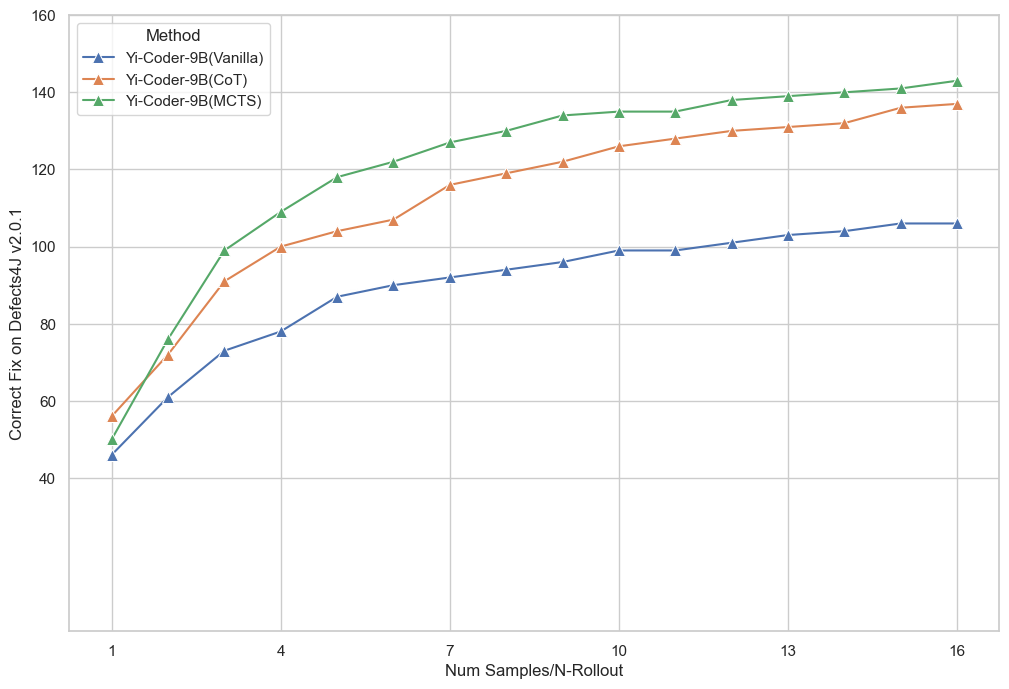

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1 = [get_passK(i, './result_yi.jsonl')[1] for i in x]
y2 = [get_passK(i, './mcts_yi_9b_16_rollout.jsonl')[1] for i in x]
y1_checked = [get_passK_human_checked(i, './result_yi.jsonl',"./manual_result_yi_9b.txt")[1] for i in x]
y2_checked = [get_passK_human_checked(i, './mcts_yi_9b_16_rollout.jsonl',"./manual_mcts_yi_9b.txt")[1] for i in x]
y3 = [get_passK(i, './cot_tot/yi-9b.cot.jsonl')[1] for i in x]
y3_checked = [get_passK_human_checked(i, './cot_tot/yi-9b.cot.jsonl',"./manual_cot_yi_9b.txt")[1] for i in x]

print(y1_checked)
print(y3_checked)
print(y2_checked)

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked+y3_checked + y2_checked,
    'Model': ['Yi-Coder-9B(Vanilla)'] * len(y1_checked)  + ['Yi-Coder-9B(CoT)'] * len(y3_checked)+ ['Yi-Coder-9B(MCTS)'] * len(y2_checked),
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# # 绘制 y1_checked 的虚线
# plt.plot(x, y1_checked, linestyle='--', color=sns.color_palette()[0], label='Yi-Coder-9B Checked', marker='^',markersize=6)
# 
# # 绘制 y2_checked 的虚线
# plt.plot(x, y2_checked, linestyle='--', color=sns.color_palette()[1], label='MCTS-Yi-Coder-9B Checked', marker='^',markersize=6)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.3)
plt.yticks([40,60,80,100,120,140,160])

# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Method')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-yi9b.pdf")

# 显示图形
plt.show()


[37, 42, 51, 61, 62, 65, 70, 74, 77, 79, 81, 81, 82, 84, 85, 86]
[22, 38, 43, 55, 61, 64, 67, 76, 80, 84, 86, 88, 89, 89, 90, 93]
[24, 37, 44, 56, 61, 65, 68, 72, 77, 80, 83, 87, 89, 93, 95, 97]


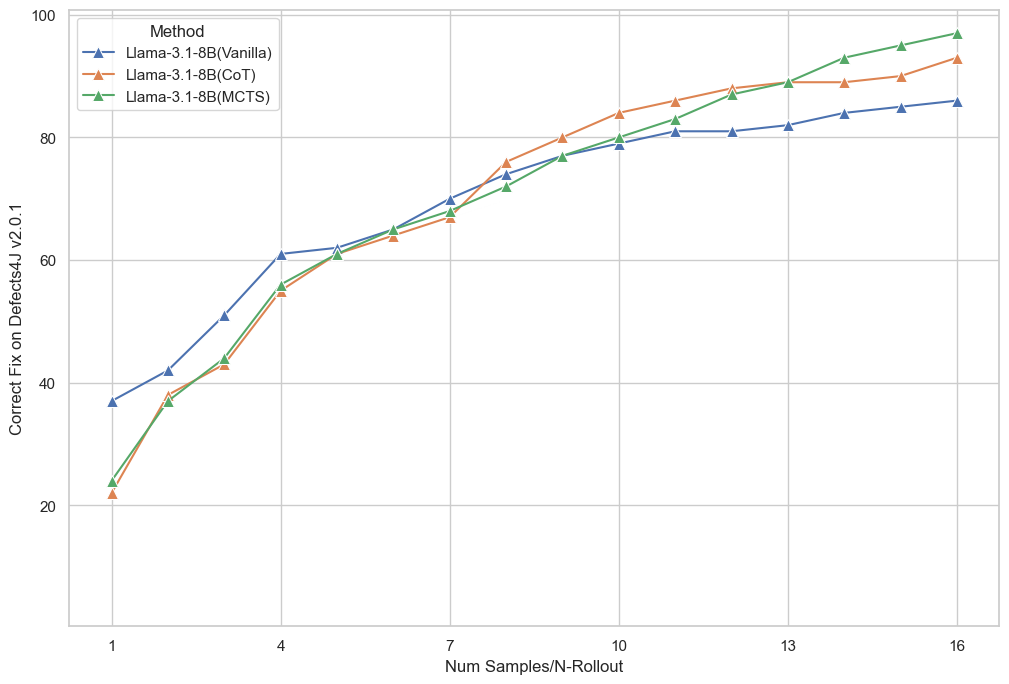

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1 = [get_passK(i, './result_llama.jsonl')[1] for i in x]
y2 = [get_passK(i, './mcts_llama_8b_16_rollout.jsonl')[1] for i in x]
y1_checked = [get_passK_human_checked(i, './result_llama.jsonl',"./manual_result_llama_8b.txt")[1] for i in x]
y2_checked = [get_passK_human_checked(i, './mcts_llama_8b_16_rollout.jsonl',"./manual_mcts_llama_8b.txt")[1] for i in x]
y3 = [get_passK(i, './cot_tot/llama-8b.cot.jsonl')[1] for i in x]
y3_checked = [get_passK_human_checked(i, './cot_tot/llama-8b.cot.jsonl',"./manual_cot_llama_8b.txt")[1] for i in x]

y2_checked=[24, 37, 44, 56, 61, 65, 68, 72, 77, 80, 83, 87, 89, 93, 95, 97]

print(y1_checked)
print(y3_checked)
print(y2_checked)

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked+y3_checked + y2_checked,
    'Model': ['Llama-3.1-8B(Vanilla)'] * len(y1_checked)  + ['Llama-3.1-8B(CoT)'] * len(y3_checked)+ ['Llama-3.1-8B(MCTS)'] * len(y2_checked),
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.3)
plt.yticks([20,40,60,80,100])

# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Method')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-llama8b.pdf")

# 显示图形
plt.show()


[27, 39, 45, 54, 57, 64, 67, 69, 72, 77, 77, 80, 83, 83, 85, 87]
[32, 42, 53, 59, 64, 72, 76, 79, 80, 84, 85, 88, 90, 92, 93, 93]
[30, 41, 50, 58, 67, 70, 74, 78, 79, 83, 85, 87, 89, 90, 94, 95]


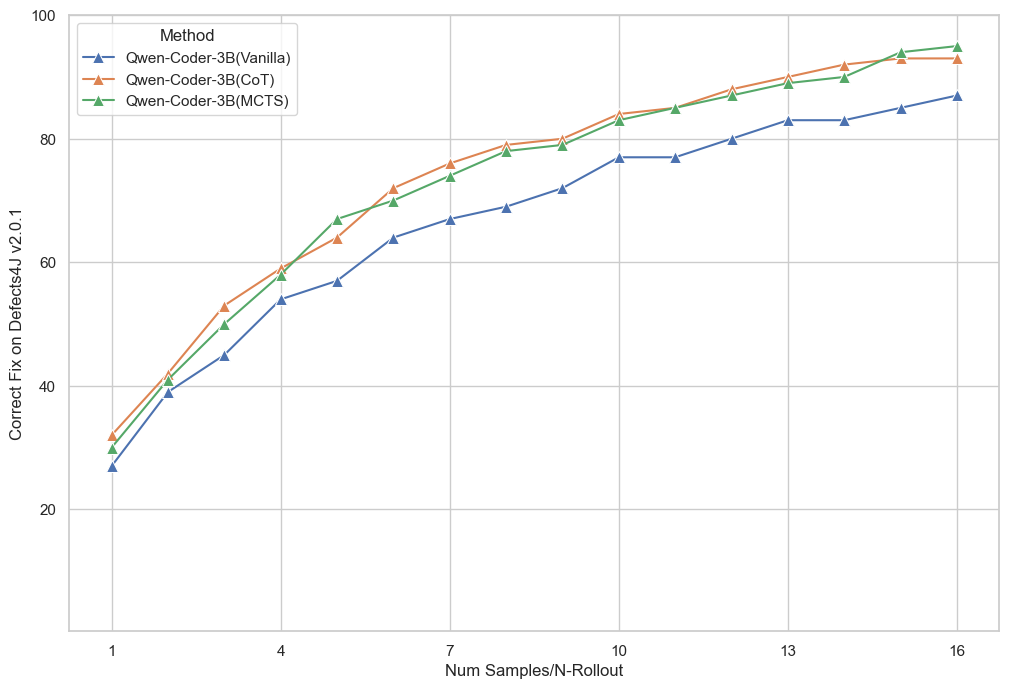

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1 = [get_passK(i, './result_qwen_3b.jsonl')[1] for i in x]
y1_checked = [get_passK_human_checked(i, './result_qwen_3b.jsonl',"./manual_result_qwen_3b.txt")[1] for i in x]

y2 = [get_passK(i, './mcts_qwen_3b_16_rollout.jsonl')[1] for i in x]
y2_checked = [get_passK_human_checked(i, './mcts_qwen_3b_16_rollout.jsonl',"./manual_mcts_qwen_3b.txt")[1] for i in x]

y3 = [get_passK(i, './cot_tot/qwen-3b.cot.jsonl')[1] for i in x]
y3_checked = [get_passK_human_checked(i, './cot_tot/qwen-3b.cot.jsonl',"./manual_cot_qwen_3b.txt")[1] for i in x]

print(y1_checked)
print(y3_checked)
print(y2_checked)

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked + y3_checked + y2_checked,
    'Model': ['Qwen-Coder-3B(Vanilla)'] * len(y1_checked) + ['Qwen-Coder-3B(CoT)'] * len(y3_checked)+ ['Qwen-Coder-3B(MCTS)'] * len(y2_checked)
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# # 绘制 y1_checked 的虚线
# plt.plot(x, y1_checked, linestyle='--', color=sns.color_palette()[0], label='Qwen-3B Checked', marker='^',markersize=6)
# 
# # 绘制 y2_checked 的虚线
# plt.plot(x, y2_checked, linestyle='--', color=sns.color_palette()[1], label='MCTS-Qwen-3B Checked', marker='^',markersize=6)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.3)
plt.yticks([20,40,60,80,100])

# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Method')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-qwen3b.pdf")

# 显示图形
plt.show()


[16, 22, 31, 37, 45, 49, 52, 55, 58, 58, 58, 58, 58, 59, 59, 59]
[6, 12, 18, 20, 24, 28, 33, 35, 38, 40, 41, 43, 43, 45, 48, 49]
[6, 14, 15, 16, 17, 17, 18, 19, 21, 25, 25, 25, 25, 25, 26, 26]


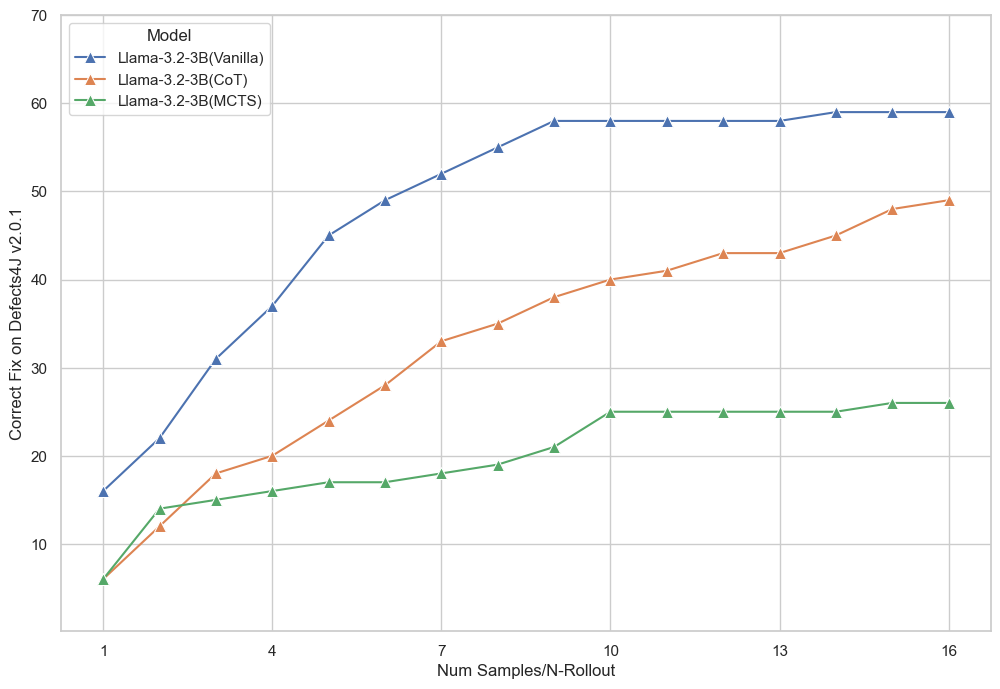

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1 = [get_passK(i, './result_llama_3.2_3b.jsonl')[1] for i in x]
y2 = [get_passK(i, './mcts_llama_3b_16_rollout.jsonl')[1] for i in x]
y1_checked = [get_passK_human_checked(i, './result_llama_3.2_3b.jsonl',"./manual_result_llama_3b.txt")[1] for i in x]
y2_checked = [get_passK_human_checked(i, './mcts_llama_3b_16_rollout.jsonl',"./manual_mcts_llama_3b.txt")[1] for i in x]

y3 = [get_passK(i, './cot_tot/llama-3b.cot.jsonl')[1] for i in x]
y3_checked = [get_passK_human_checked(i, './cot_tot/llama-3b.cot.jsonl',"./manual_cot_llama_3b.txt")[1] for i in x]

print(y1_checked)
print(y3_checked)
print(y2_checked)

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked + y3_checked + y2_checked,
    'Model': ['Llama-3.2-3B(Vanilla)'] * len(y1_checked) + ['Llama-3.2-3B(CoT)'] * len(y3_checked)+ ['Llama-3.2-3B(MCTS)'] * len(y2_checked)
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# # 绘制 y1_checked 的虚线
# plt.plot(x, y1_checked, linestyle='--', color=sns.color_palette()[0], label='Llama-3B Checked', marker='^',markersize=6)
# 
# # 绘制 y2_checked 的虚线
# plt.plot(x, y2_checked, linestyle='--', color=sns.color_palette()[1], label='MCTS-Llama-3B Checked', marker='^',markersize=6)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.1)
plt.yticks([10,20,30,40,50,60,70])
# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Model')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-llama3b.pdf")

# 显示图形
plt.show()


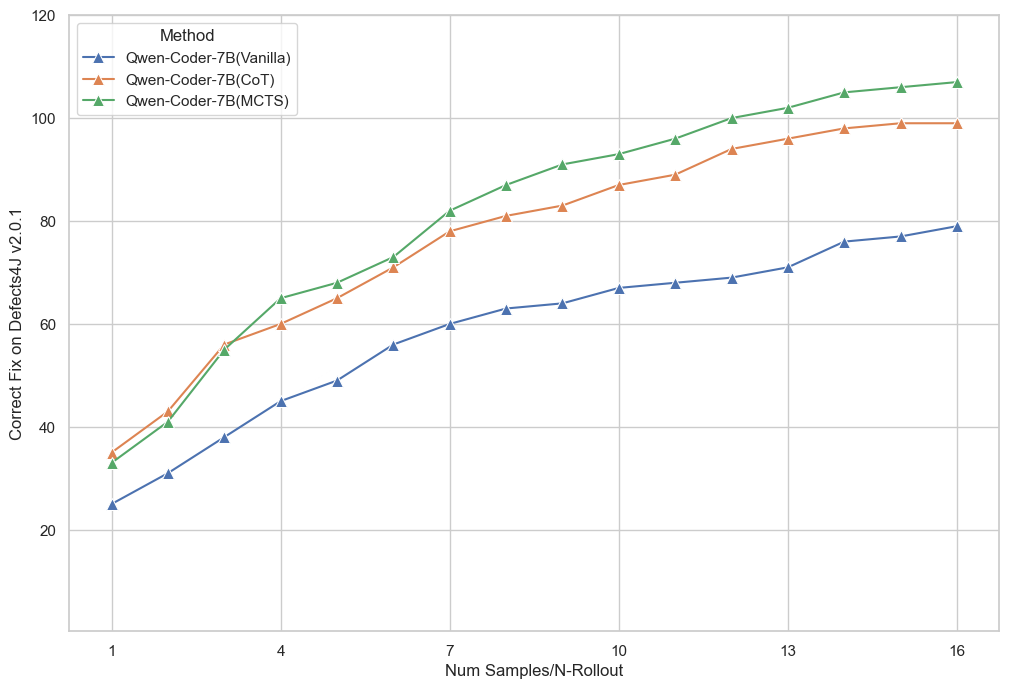

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 示例数据
x = range(1, 17)
y1_checked=[25,31,38,45,49,56,60,63,64,67,68,69,71,76,77,79]
y2_checked=[33,41, 55, 65, 68, 73, 82, 87, 91, 93, 96, 100, 102, 105, 106, 107]

y3_checked=[35, 43, 56, 60, 65, 71, 78, 81, 83, 87, 89, 94, 96, 98, 99, 99]

# 将数据转换为 DataFrame
data = pd.DataFrame({
    'Num Samples/N-rollout': list(x) * 3,
    'Bugfix Number': y1_checked+y3_checked + y2_checked,
    'Model': ['Qwen-Coder-7B(Vanilla)'] * len(y1_checked)  + ['Qwen-Coder-7B(CoT)'] * len(y3_checked)+ ['Qwen-Coder-7B(MCTS)'] * len(y2_checked),
})

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12 , 8))

# 使用 Seaborn 绘制折线图
sns.lineplot(data=data, x='Num Samples/N-rollout', y='Bugfix Number', hue='Model', marker='^',markersize=8)

# 设置横坐标步长为2
plt.xticks([1, 4, 7, 10, 13, 16])

# 设置纵坐标起点和刻度间隔
plt.ylim(bottom=0.3)
plt.yticks([20,40,60,80,100,120])

# 添加标题和标签
# plt.title('')
plt.xlabel('Num Samples/N-Rollout')
plt.ylabel('Correct Fix on Defects4J v2.0.1')

# 显示图例
plt.legend(title='Method')

# 保存图表为 PDF 文件
plt.savefig("./pdf/d4j-mcts-qwen7b.pdf")

# 显示图形
plt.show()


In [79]:
"""
These codes are from https://github.com/tctianchi/pyvenn/blob/master/venn.py

"""

# coding: utf-8
from itertools import chain
try:
    # since python 3.10
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)

def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
    xy = [
        (x1, y1),
        (x2, y2),
        (x3, y3),
    ]
    polygon = patches.Polygon(
        xy=xy,
        closed=True,
        color=fillcolor)
    ax.add_patch(polygon)

def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

def venn2(labels, names=['A', 'B'], **options):
    """
    plots a 2-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('01', '10', '11'),
              hence a valid set could look like: {'01': 'text 1', '10': 'text 2', '11': 'text 3'}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(2)])
    figsize = options.get('figsize', (9, 7))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=0.7)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.375, 0.3, 0.5, 0.5, 0.0, colors[0])
    draw_ellipse(fig, ax, 0.625, 0.3, 0.5, 0.5, 0.0, colors[1])
    draw_text(fig, ax, 0.74, 0.30, labels.get('01', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.26, 0.30, labels.get('10', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.30, labels.get('11', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.20, 0.56, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.80, 0.56, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn3(labels, names=['A', 'B', 'C'], **options):
    """
    plots a 3-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('001', '010', '100', ...),
              hence a valid set could look like: {'001': 'text 1', '010': 'text 2', '100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(3)])
    figsize = options.get('figsize', (9, 9))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.333, 0.633, 0.5, 0.5, 0.0, colors[0])
    draw_ellipse(fig, ax, 0.666, 0.633, 0.5, 0.5, 0.0, colors[1])
    draw_ellipse(fig, ax, 0.500, 0.310, 0.5, 0.5, 0.0, colors[2])
    draw_text(fig, ax, 0.50, 0.27, labels.get('001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.73, 0.65, labels.get('010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.46, labels.get('011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.27, 0.65, labels.get('100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.46, labels.get('101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.65, labels.get('110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.51, labels.get('111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.15, 0.87, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.85, 0.87, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.50, 0.02, names[2], colors[2], fontsize=fontsize, va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    """
    plots a 4-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
              hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    plt.savefig(options.get("output","./pdf/venn4.pdf"))

    return fig, ax

def venn5(labels, names=['A', 'B', 'C', 'D', 'E'], **options):
    """
    plots a 5-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('00001', '00010', '00100', ...),
              hence a valid set could look like: {'00001': 'text 1', '00010': 'text 2', '00100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(5)])
    figsize = options.get('figsize', (16, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.428, 0.449, 0.87, 0.50, 155.0, colors[0])
    draw_ellipse(fig, ax, 0.469, 0.543, 0.87, 0.50, 82.0, colors[1])
    draw_ellipse(fig, ax, 0.558, 0.523, 0.87, 0.50, 10.0, colors[2])
    draw_ellipse(fig, ax, 0.578, 0.432, 0.87, 0.50, 118.0, colors[3])
    draw_ellipse(fig, ax, 0.489, 0.383, 0.87, 0.50, 46.0, colors[4])
    draw_text(fig, ax, 0.27, 0.11, labels.get('00001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.72, 0.11, labels.get('00010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.55, 0.13, labels.get('00011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.91, 0.58, labels.get('00100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.78, 0.64, labels.get('00101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.84, 0.41, labels.get('00110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.76, 0.55, labels.get('00111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.9, labels.get('01000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.15, labels.get('01001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.42, 0.78, labels.get('01010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.15, labels.get('01011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.67, 0.76, labels.get('01100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.70, 0.71, labels.get('01101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.74, labels.get('01110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.64, 0.67, labels.get('01111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.10, 0.61, labels.get('10000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.20, 0.31, labels.get('10001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.76, 0.25, labels.get('10010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.23, labels.get('10011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.18, 0.50, labels.get('10100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.21, 0.37, labels.get('10101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.81, 0.37, labels.get('10110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.74, 0.40, labels.get('10111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.27, 0.70, labels.get('11000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.34, 0.25, labels.get('11001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.33, 0.72, labels.get('11010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.22, labels.get('11011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.25, 0.58, labels.get('11100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.28, 0.39, labels.get('11101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.36, 0.66, labels.get('11110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.47, labels.get('11111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.02, 0.72, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.78, 0.94, names[1], colors[1], fontsize=fontsize, va="bottom")
    draw_text(fig, ax, 0.97, 0.74, names[2], colors[2], fontsize=fontsize, ha="left")
    draw_text(fig, ax, 0.88, 0.05, names[3], colors[3], fontsize=fontsize, ha="left")
    draw_text(fig, ax, 0.12, 0.05, names[4], colors[4], fontsize=fontsize, ha="right")
    # leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    # leg.get_frame().set_alpha(0.5)
    plt.savefig(options.get("output","./pdf/venn5.pdf"))

    return fig, ax

def venn6(labels, names=['A', 'B', 'C', 'D', 'E', 'F'], **options):
    """
    plots a 6-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('000001', '000010', '000100', ...),
              hence a valid set could look like: {'000001': 'text 1', '000010': 'text 2', '000100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(6)])
    figsize = options.get('figsize', (40, 40))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.230, top=0.845)
    ax.set_xlim(left=0.173, right=0.788)

    # body
    # See https://web.archive.org/web/20040819232503/http://www.hpl.hp.com/techreports/2000/HPL-2000-73.pdf
    draw_triangle(fig, ax, 0.637, 0.921, 0.649, 0.274, 0.188, 0.667, colors[0])
    draw_triangle(fig, ax, 0.981, 0.769, 0.335, 0.191, 0.393, 0.671, colors[1])
    draw_triangle(fig, ax, 0.941, 0.397, 0.292, 0.475, 0.456, 0.747, colors[2])
    draw_triangle(fig, ax, 0.662, 0.119, 0.316, 0.548, 0.662, 0.700, colors[3])
    draw_triangle(fig, ax, 0.309, 0.081, 0.374, 0.718, 0.681, 0.488, colors[4])
    draw_triangle(fig, ax, 0.016, 0.626, 0.726, 0.687, 0.522, 0.327, colors[5])
    draw_text(fig, ax, 0.212, 0.562, labels.get('000001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.430, 0.249, labels.get('000010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.356, 0.444, labels.get('000011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.609, 0.255, labels.get('000100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.323, 0.546, labels.get('000101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.513, 0.316, labels.get('000110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.523, 0.348, labels.get('000111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.747, 0.458, labels.get('001000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.325, 0.492, labels.get('001001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.670, 0.481, labels.get('001010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.359, 0.478, labels.get('001011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.653, 0.444, labels.get('001100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.344, 0.526, labels.get('001101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.653, 0.466, labels.get('001110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.363, 0.503, labels.get('001111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.750, 0.616, labels.get('010000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.682, 0.654, labels.get('010001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.402, 0.310, labels.get('010010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.392, 0.421, labels.get('010011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.653, 0.691, labels.get('010100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.651, 0.644, labels.get('010101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.490, 0.340, labels.get('010110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.468, 0.399, labels.get('010111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.692, 0.545, labels.get('011000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.666, 0.592, labels.get('011001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.665, 0.496, labels.get('011010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.374, 0.470, labels.get('011011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.653, 0.537, labels.get('011100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.652, 0.579, labels.get('011101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.653, 0.488, labels.get('011110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.389, 0.486, labels.get('011111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.553, 0.806, labels.get('100000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.313, 0.604, labels.get('100001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.388, 0.694, labels.get('100010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.375, 0.633, labels.get('100011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.605, 0.359, labels.get('100100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.334, 0.555, labels.get('100101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.582, 0.397, labels.get('100110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.542, 0.372, labels.get('100111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.468, 0.708, labels.get('101000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.355, 0.572, labels.get('101001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.420, 0.679, labels.get('101010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.375, 0.597, labels.get('101011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.641, 0.436, labels.get('101100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.348, 0.538, labels.get('101101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.635, 0.453, labels.get('101110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.370, 0.548, labels.get('101111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.594, 0.689, labels.get('110000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.579, 0.670, labels.get('110001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.398, 0.670, labels.get('110010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.395, 0.653, labels.get('110011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.633, 0.682, labels.get('110100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.616, 0.656, labels.get('110101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.587, 0.427, labels.get('110110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.526, 0.415, labels.get('110111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.495, 0.677, labels.get('111000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.505, 0.648, labels.get('111001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.428, 0.663, labels.get('111010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.430, 0.631, labels.get('111011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.639, 0.524, labels.get('111100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.591, 0.604, labels.get('111101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.622, 0.477, labels.get('111110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.501, 0.523, labels.get('111111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.674, 0.824, names[0], colors[0], fontsize=fontsize)
    draw_text(fig, ax, 0.747, 0.751, names[1], colors[1], fontsize=fontsize)
    draw_text(fig, ax, 0.739, 0.396, names[2], colors[2], fontsize=fontsize)
    draw_text(fig, ax, 0.700, 0.247, names[3], colors[3], fontsize=fontsize)
    draw_text(fig, ax, 0.291, 0.255, names[4], colors[4], fontsize=fontsize)
    draw_text(fig, ax, 0.203, 0.484, names[5], colors[5], fontsize=fontsize)
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(options.get("output","./pdf/venn6.pdf"))

    return fig, ax
##%%

In [4]:
    # 创建一个标签字典
    label_dict = {}
    
    def generate_label(n):
        if n<=0:
            return []
        if n==1:
            return ['0','1']
        result=[]
        for t in generate_label(n-1):
            result.append(t+'0')
            result.append((t+'1'))
        return result
    
    labels=generate_label(len(sets))
    
    def get_intersection_by_label(label):
        target,rest=None,None
        for i in range(len(label)):
            if label[i]=='1':
                if target is None:
                    target=sets[i]
                else:
                    target=target.intersection(sets[i])
            else:
                if rest is None:
                    rest=sets[i]
                else:
                    rest=rest.union(sets[i])
        if target is None:
            return set()
        if rest is None:
            return target
        
        return target.difference(rest)
    
    for l in labels:
        label_dict[l]=get_intersection_by_label(l)
        
    return label_dict


##%%

In [1]:


def read_pass_result(file_path):
    result=set()
    with open(file_path, 'r') as f:
        for line in f.readlines():
            json_line=json.loads(line)
            if json_line['eval']=='PASS':
                result.add(json_line['project']+"_"+json_line["bug_id"])
    return result
def read_all_result(file_path):
    result=set()
    with open(file_path, 'r') as f:
        for line in f.readlines():
            json_line=json.loads(line)
            result.add(json_line['project']+"_"+json_line["bug_id"])
    return result

def read_pass_result_from_manual_file(file_path):
    result=set()
    with open(file_path, 'r') as f:
        for line in f.readlines():
            if line.split(",")[1].strip()=="True":
                result.add(line.split(",")[0].strip())
    return result

##%%


{'00000': 0, '00001': 5, '00010': 6, '00011': 1, '00100': 13, '00101': 3, '00110': 4, '00111': 1, '01000': 11, '01001': 4, '01010': 5, '01011': 0, '01100': 4, '01101': 2, '01110': 1, '01111': 0, '10000': 27, '10001': 10, '10010': 9, '10011': 2, '10100': 11, '10101': 6, '10110': 6, '10111': 5, '11000': 10, '11001': 6, '11010': 9, '11011': 5, '11100': 5, '11101': 6, '11110': 9, '11111': 23}


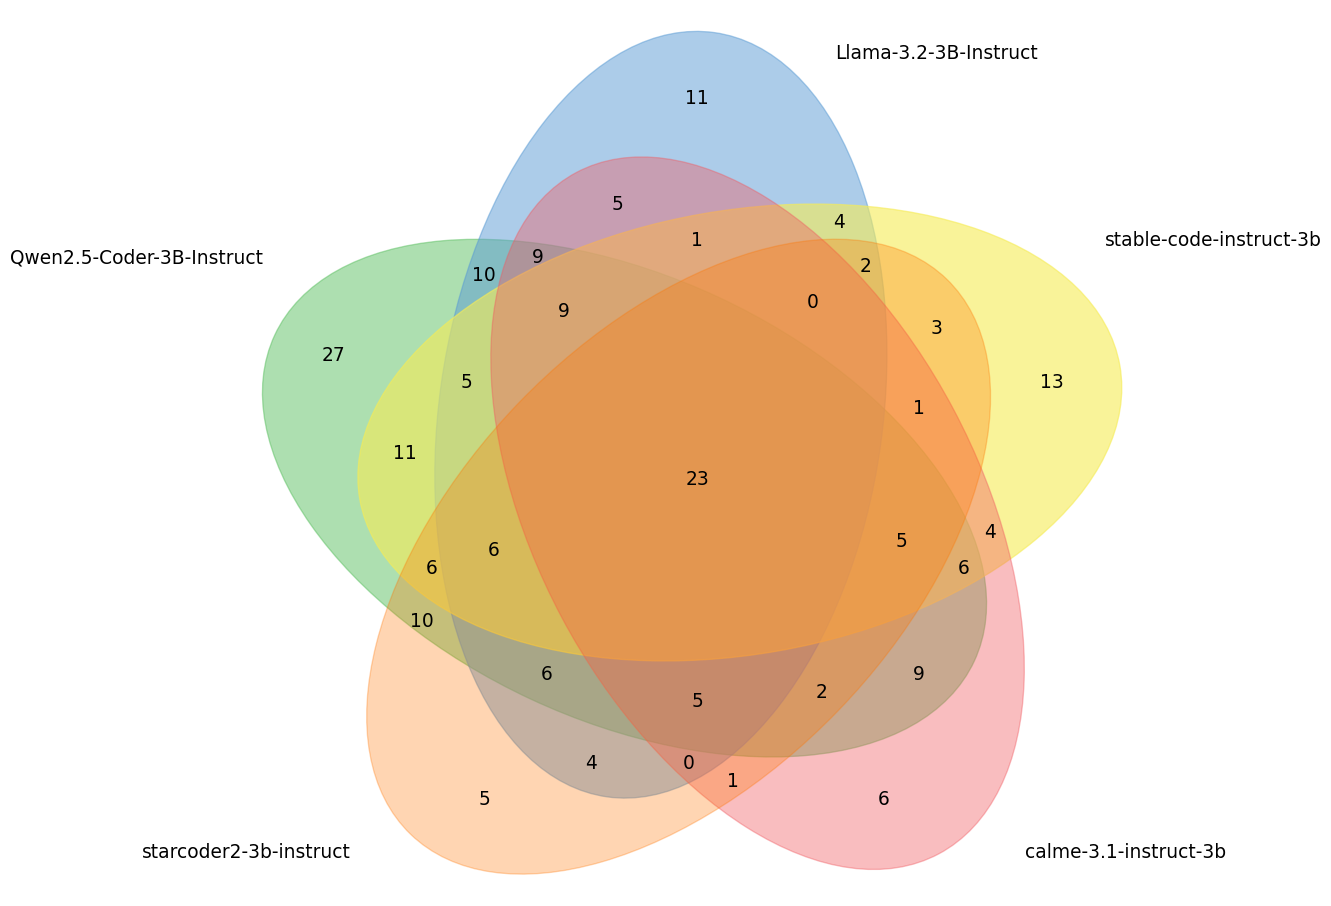

In [19]:
set_llama_3b=read_pass_result("./result_llama_3.2_3b.jsonl")
set_stable=read_pass_result("./result_stable.jsonl")
set_calme=read_pass_result("./result_calme.jsonl")
set_starcoder=read_pass_result("./result_starcoder.jsonl")
intersections=calculate_intersections([set_qwen_3b,set_llama_3b,set_stable,set_calme,set_starcoder])
intersections={k:len(v) for k,v in intersections.items()}
print(intersections)
# print(intersections)

fig,_=venn5(intersections,names=['Qwen2.5-Coder-3B-Instruct','Llama-3.2-3B-Instruct','stable-code-instruct-3b','calme-3.1-instruct-3b','starcoder2-3b-instruct'],output="./pdf/venn_3b.pdf")


##%%

{'00000': 0, '00001': 7, '00010': 13, '00011': 3, '00100': 27, '00101': 3, '00110': 7, '00111': 4, '01000': 5, '01001': 0, '01010': 3, '01011': 3, '01100': 9, '01101': 1, '01110': 11, '01111': 4, '10000': 6, '10001': 4, '10010': 8, '10011': 1, '10100': 3, '10101': 4, '10110': 4, '10111': 11, '11000': 3, '11001': 1, '11010': 3, '11011': 3, '11100': 8, '11101': 5, '11110': 26, '11111': 51}


(<Figure size 1536x1152 with 1 Axes>, <Axes: >)

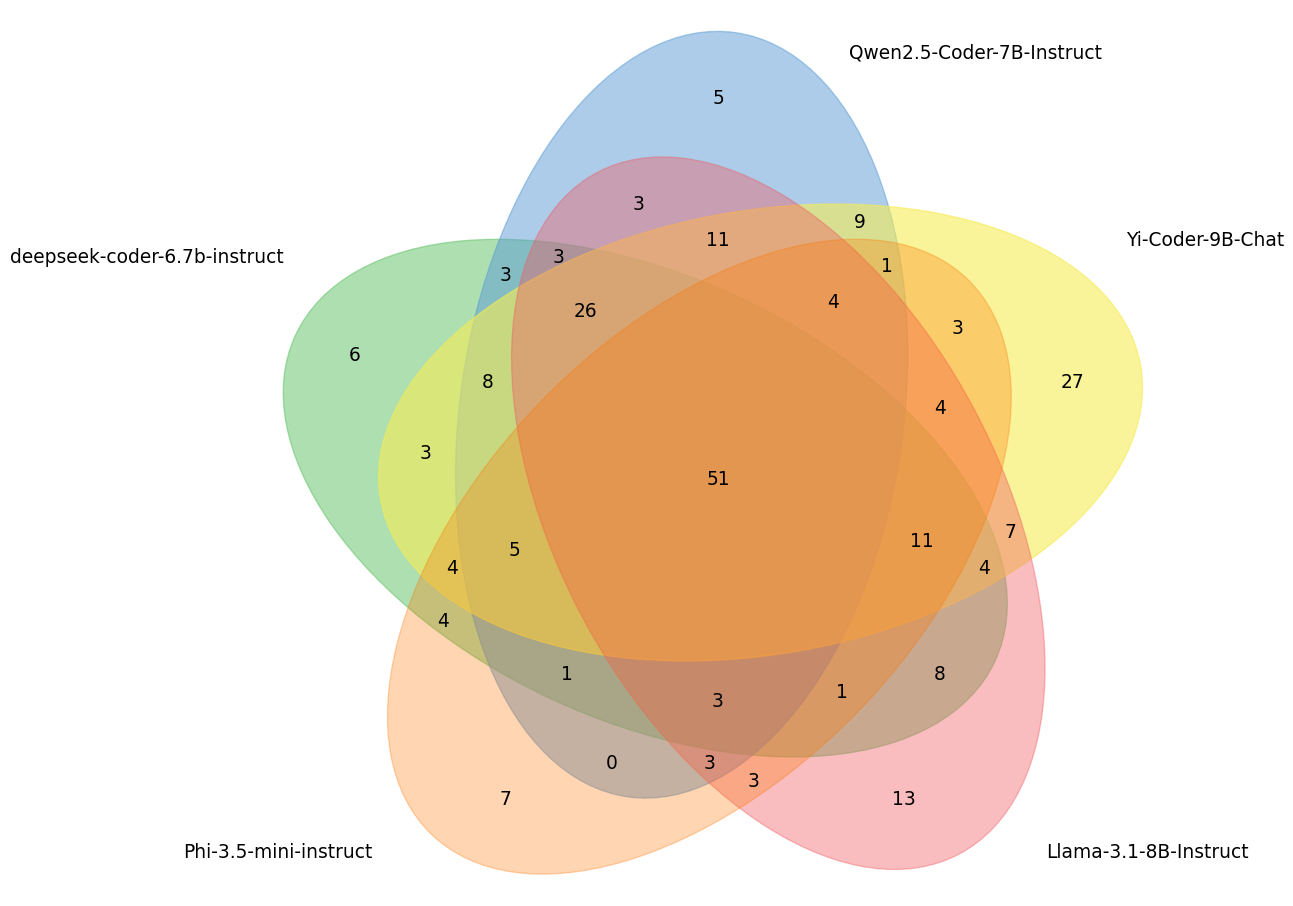

In [17]:
set_qwen_7b=read_pass_result("./result_qwen_7b.jsonl")
set_yi=read_pass_result("./result_yi.jsonl")
set_llama_8b=read_pass_result("./result_llama.jsonl")
# set_deci=read_pass_result("./result_deci.jsonl")
# set_falcon=read_pass_result("./result_falcon.jsonl")
set_phi=read_pass_result("./result_phi.jsonl")
intersections=calculate_intersections([set_dscoder,set_qwen_7b,set_yi,set_llama_8b,set_phi])
intersections={k:len(v) for k,v in intersections.items()}
print(intersections)


venn5(intersections,names=['deepseek-coder-6.7b-instruct','Qwen2.5-Coder-7B-Instruct','Yi-Coder-9B-Chat','Llama-3.1-8B-Instruct','Phi-3.5-mini-instruct'],output="./pdf/venn_7b.pdf")
##%%

In [23]:
import json


def calculate_repair_num_by_project(file_path):
    result={}
    with open(file_path, 'r') as f:
        for line in f.readlines():
            json_line=json.loads(line)
            if json_line['eval']=='PASS':
                result.setdefault(json_line['project'],[]).append(json_line['bug_id'])
    return result

apr_result=calculate_repair_num_by_project("./result_yi.jsonl")
print({k:len(v) for k,v in apr_result.items()})
print(sum([len(v) for v in apr_result.values()]))
##%%

{'Chart': 10, 'Cli': 12, 'Closure': 25, 'Codec': 5, 'Compress': 14, 'Csv': 8, 'Gson': 3, 'JacksonCore': 4, 'JacksonDatabind': 19, 'JacksonXml': 1, 'Jsoup': 26, 'JxPath': 2, 'Lang': 15, 'Math': 28, 'Mockito': 5, 'Time': 1}
178


In [25]:
import pandas as pd

# 读取CSV文件
file_path = './rapgen/Defects4J_result_summary_v2p0.csv'  # 请将'your_file.csv'替换为你的CSV文件路径
data = pd.read_csv(file_path)

# 筛选出 RAP_Gen_reapir_outcome 列等于 1 的行
filtered_data = data[data['RAP_Gen_reapir_outcome'] == 1]

# 创建新列，提取 defects4J_id 列中的值
filtered_data['defects4J_id_group'] = filtered_data['defects4J_id'].apply(lambda x: x.split("_")[0])

# 按照新列进行分组统计
grouped_counts = filtered_data['defects4J_id_group'].value_counts()

# 输出统计结果
print(grouped_counts)

##%%

defects4J_id_group
JacksonDatabind    13
Jsoup              10
Cli                 7
Compress            6
Codec               5
JacksonCore         5
Closure             2
Csv                 2
Collections         1
JacksonXml          1
JxPath              1
Name: count, dtype: int64


/var/folders/m0/bq55cd_d4ks7fz_vnjvd5ykm0000gp/T/ipykernel_99309/1450567962.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['defects4J_id_group'] = filtered_data['defects4J_id'].apply(lambda x: x.split("_")[0])


In [26]:
import pandas as pd

# 读取CSV文件
file_path = './rapgen/Defects4J_result_summary_v1p2.csv'  # 请将'your_file.csv'替换为你的CSV文件路径
data = pd.read_csv(file_path)

# 筛选出 RAP_Gen_reapir_outcome 列等于 1 的行
filtered_data = data[data['RAP_Gen_reapir_outcome'] == 1]

# 创建新列，提取 defects4J_id 列中的值
filtered_data['defects4J_id_group'] = filtered_data['defects4J_id'].apply(lambda x: x.split("_")[0])

# 按照新列进行分组统计
grouped_counts = filtered_data['defects4J_id_group'].value_counts()

# 输出统计结果
print(grouped_counts)

##%%

defects4J_id_group
Math       26
Closure    22
Lang       12
Chart       9
Mockito     2
Time        1
Name: count, dtype: int64


/var/folders/m0/bq55cd_d4ks7fz_vnjvd5ykm0000gp/T/ipykernel_99309/1492810513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['defects4J_id_group'] = filtered_data['defects4J_id'].apply(lambda x: x.split("_")[0])


In [4]:

# 区别defects4j v1.2和v2版本
defects4j_history_bugs=get_history_defects4j_project_and_bug("/Users/tom/Downloads/defects4j-1.2.0")
pass_result=read_pass_result("./result_yi.jsonl")
history_pass=0
for project,bug in [x.split("_") for x in pass_result]:
    if bug in defects4j_history_bugs.get(project,[]):
        history_pass+=1
print(history_pass)
##%%

96


In [21]:
import json
# 区别defects4j v1.2和v2版本
defects4j_history_bugs=get_history_defects4j_project_and_bug("/Users/tom/Downloads/defects4j-1.2.0")

human_check=[]
pass_result=[]
with open('./manual_mcts_gpt4o_mini.txt','r') as f:
    for line in f.readlines():
        if line.strip().split(",")[1].lower()=="true":
            human_check.append(line.split(",")[0].lower())
            
with open("./mcts_gpt_4o_mini_16_rollout.jsonl",'r') as f:
    for line in f.readlines():
        json_line=json.loads(line)
        if  json_line['eval']=='PASS' and json_line['rollout']<=16 and (json_line['project']+"_"+str(json_line['bug_id'])).lower() in human_check  :
            pass_result.append(json_line['project']+"_"+str(json_line["bug_id"]))
print(len(pass_result))
d4j12_result,d4j2_result=[],[]
history_pass=0
for project,bug in [x.split("_") for x in pass_result]:
    if bug in defects4j_history_bugs.get(project,[]):
        history_pass+=1
        d4j12_result.append(project+"_"+bug)    
    else:
        d4j2_result.append(project+"_"+bug)
# print(history_pass)
print(d4j12_result)
print(d4j2_result)


##%%

158
['Chart_1', 'Chart_3', 'Chart_4', 'Chart_5', 'Chart_7', 'Chart_8', 'Chart_11', 'Chart_13', 'Chart_20', 'Chart_26', 'Closure_5', 'Closure_19', 'Closure_22', 'Closure_31', 'Closure_38', 'Closure_52', 'Closure_57', 'Closure_61', 'Closure_62', 'Closure_65', 'Closure_70', 'Closure_73', 'Closure_77', 'Closure_78', 'Closure_86', 'Closure_92', 'Closure_97', 'Closure_119', 'Closure_124', 'Closure_126', 'Closure_128', 'Lang_14', 'Lang_16', 'Lang_18', 'Lang_21', 'Lang_24', 'Lang_28', 'Lang_33', 'Lang_40', 'Lang_51', 'Lang_52', 'Lang_38', 'Lang_39', 'Lang_43', 'Lang_44', 'Lang_45', 'Lang_55', 'Lang_59', 'Math_2', 'Math_5', 'Math_11', 'Math_19', 'Math_23', 'Math_24', 'Math_26', 'Math_27', 'Math_32', 'Math_41', 'Math_42', 'Math_45', 'Math_53', 'Math_57', 'Math_59', 'Math_60', 'Math_69', 'Math_70', 'Math_72', 'Math_73', 'Math_85', 'Math_89', 'Math_91', 'Math_94', 'Math_95', 'Math_96', 'Math_106', 'Mockito_26', 'Mockito_29', 'Mockito_33', 'Mockito_34', 'Time_19']
['Cli_4', 'Cli_5', 'Cli_8', 'Cli_9

{'0000': 0, '0001': 11, '0010': 12, '0011': 3, '0100': 5, '0101': 3, '0110': 5, '0111': 7, '1000': 8, '1001': 1, '1010': 16, '1011': 9, '1100': 0, '1101': 3, '1110': 2, '1111': 20}


(<Figure size 1536x1152 with 1 Axes>, <Axes: >)

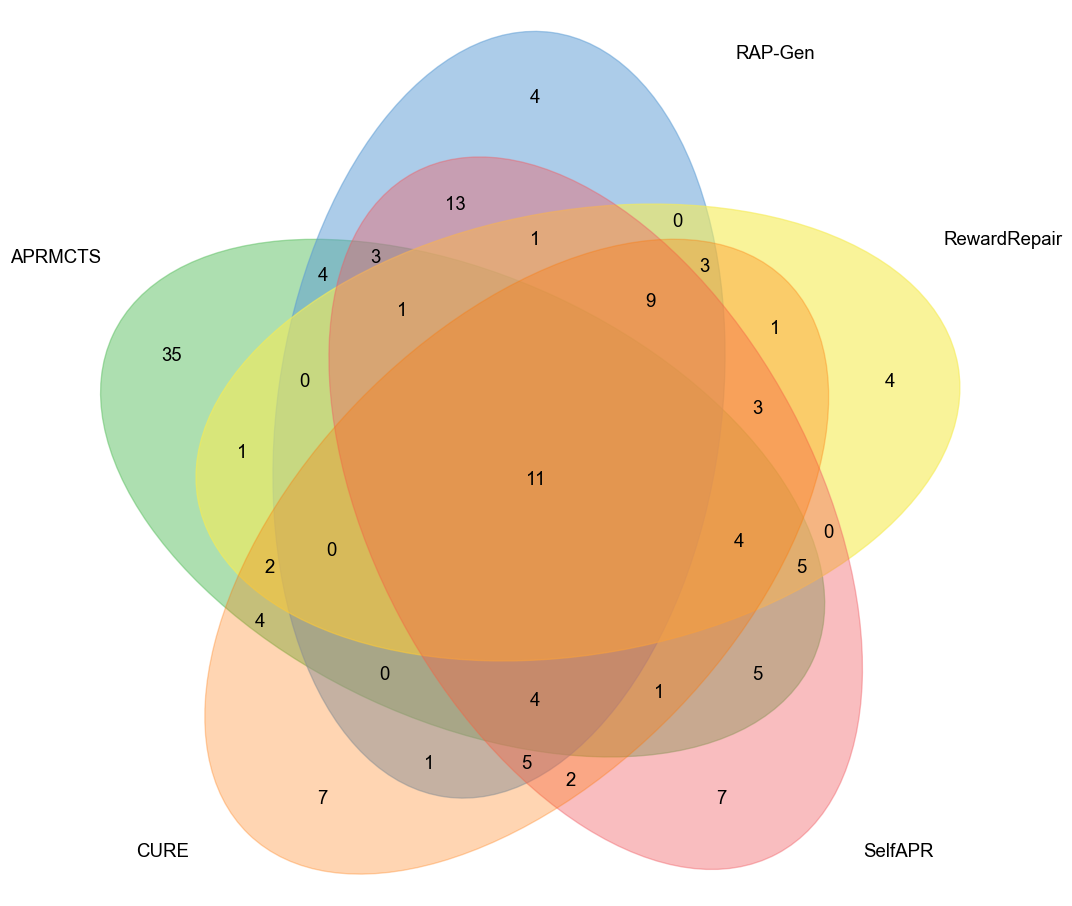

In [23]:
mcts_defects4j2=['Cli_4', 'Cli_5', 'Cli_8', 'Cli_9', 'Cli_11', 'Cli_17', 'Cli_19', 'Cli_26', 'Cli_28', 'Cli_35', 'Cli_40', 'Closure_152', 'Closure_161', 'Closure_168', 'Codec_3', 'Codec_7', 'Codec_17', 'Codec_18', 'Compress_1', 'Compress_7', 'Compress_17', 'Compress_21', 'Compress_24', 'Compress_26', 'Compress_30', 'Compress_32', 'Compress_44', 'Compress_45', 'Csv_2', 'Csv_4', 'Csv_5', 'Csv_9', 'Csv_10', 'Csv_11', 'Gson_5', 'Gson_11', 'Gson_12', 'Gson_13', 'Gson_15', 'Gson_16', 'JacksonCore_5', 'JacksonCore_6', 'JacksonCore_8', 'JacksonCore_25', 'JacksonDatabind_1', 'JacksonDatabind_27', 'JacksonDatabind_34', 'JacksonDatabind_42', 'JacksonDatabind_46', 'JacksonDatabind_57', 'JacksonDatabind_70', 'JacksonDatabind_91', 'JacksonDatabind_97', 'JacksonDatabind_99', 'JacksonDatabind_102', 'JacksonXml_3', 'Jsoup_1', 'Jsoup_10', 'Jsoup_20', 'Jsoup_25', 'Jsoup_40', 'Jsoup_41', 'Jsoup_42', 'Jsoup_45', 'Jsoup_46', 'Jsoup_48', 'Jsoup_49', 'Jsoup_55', 'Jsoup_57', 'Jsoup_59', 'Jsoup_70', 'Jsoup_72', 'Jsoup_80', 'Jsoup_85', 'Jsoup_88', 'Jsoup_89', 'Jsoup_90', 'JxPath_8']
cure_defects4j12 = ['Chart_11', 'Closure_62', 'Lang_59', 'Chart_12', 'Lang_6', 'Closure_126', 'Chart_17', 'Closure_70',
                    'Chart_14', 'Chart_1', 'Closure_73', 'Mockito_5', 'Math_98', 'Time_19', 'Math_58', 'Lang_38',
                    'Lang_10', 'Math_70', 'Mockito_29', 'Math_65', 'Math_59', 'Math_75', 'Lang_29', 'Mockito_38',
                    'Closure_11', 'Closure_10', 'Closure_38', 'Lang_26', 'Math_79', 'Math_50', 'Math_2', 'Math_82',
                    'Math_41', 'Math_57', 'Closure_18', 'Math_94', 'Math_80', 'Math_56', 'Lang_51', 'Mockito_8',
                    'Chart_24', 'Math_30', 'Closure_57', 'Chart_26', 'Math_27', 'Closure_40', 'Lang_43', 'Lang_57',
                    'Closure_92', 'Closure_86', 'Closure_102', 'Math_22', 'Math_34', 'Chart_9', 'Chart_8', 'Chart_20',
                    'Closure_46']

cure_defects4j2 = ['JxPath_5', 'JacksonDatabind_37', 'Jsoup_77', 'Jsoup_88', 'Collection_26', 'JacksonCore_25',
                   'Codec_17', 'Closure_168', 'JxPath_10', 'Cli_25', 'Cli_8', 'JacksonCore_5', 'Jsoup_68', 'Codec_4',
                   'JacksonDatabind_16', 'Jsoup_43', 'Codec_7', 'Codec_2', 'Compress_31']

rapgen_defects4j12 = ['Chart_1', 'Chart_11', 'Chart_12', 'Chart_16', 'Chart_20', 'Chart_7', 'Chart_8', 'Chart_9',
                      'Closure_104', 'Closure_106', 'Closure_11', 'Closure_113', 'Closure_115', 'Closure_123',
                      'Closure_125', 'Closure_126', 'Closure_18', 'Closure_19', 'Closure_46', 'Closure_57',
                      'Closure_65', 'Closure_70', 'Closure_73', 'Closure_75', 'Closure_77', 'Closure_79', 'Closure_86',
                      'Closure_92', 'Lang_10', 'Lang_26', 'Lang_29', 'Lang_34', 'Lang_35', 'Lang_51', 'Lang_52',
                      'Lang_57', 'Lang_6', 'Lang_60', 'Lang_7', 'Math_104', 'Math_22', 'Math_30', 'Math_34', 'Math_35',
                      'Math_41', 'Math_49', 'Math_5', 'Math_57', 'Math_67', 'Math_70', 'Math_72', 'Math_75', 'Math_77',
                      'Math_79', 'Math_80', 'Math_98', 'Mockito_26', 'Mockito_5', 'Time_19']
rapgen_defects4j2 = ['Cli_17', 'Cli_27', 'Cli_28', 'Cli_32', 'Cli_34', 'Cli_8', 'Closure_150', 'Closure_168',
                     'Codec_17', 'Codec_4', 'Codec_7', 'Codec_8', 'Collections_26', 'Compress_14', 'Compress_19',
                     'Compress_27', 'Compress_31', 'Compress_32', 'Csv_11', 'Csv_15', 'JacksonCore_14',
                     'JacksonCore_25', 'JacksonCore_5', 'JacksonCore_8', 'JacksonDatabind_102', 'JacksonDatabind_107',
                     'JacksonDatabind_13', 'JacksonDatabind_17', 'JacksonDatabind_27', 'JacksonDatabind_34',
                     'JacksonDatabind_46', 'JacksonDatabind_49', 'JacksonDatabind_54', 'JacksonDatabind_83',
                     'JacksonDatabind_99', 'JacksonXml_5', 'Jsoup_17', 'Jsoup_32', 'Jsoup_40', 'Jsoup_41', 'Jsoup_43',
                     'Jsoup_45', 'Jsoup_57', 'Jsoup_62', 'Jsoup_68', 'Jsoup_86', 'JxPath_5']

rewardrepair_defects4j12 = ['Math_57', 'Math_41', 'Time_19', 'Math_30', 'Math_82', 'Lang_29', 'Math_59', 'Math_34',
                            'Lang_45', 'Math_70', 'Closure_101', 'Chart_12', 'Lang_21', 'Lang_59', 'Closure_73',
                            'Math_85', 'Closure_62', 'Chart_24', 'Closure_86', 'Closure_70', 'Closure_18', 'Chart_11',
                            'Math_11', 'Lang_6', 'Closure_31', 'Lang_33', 'Mockito_26', 'Math_33', 'Math_75', 'Math_94',
                            'Math_80', 'Mockito_5', 'Closure_11', 'Chart_1', 'Closure_1', 'Math_50', 'Closure_126',
                            'Closure_92', 'Mockito_38', 'Chart_9', 'Closure_38', 'Math_104', 'Lang_57', 'Math_105',
                            'Math_2']
rewardrepair_defects4j2 = ['Closure_168', 'JxPath_16', 'JacksonDatabind_57', 'Jsoup_52', 'Jsoup_57',
                           'JacksonDatabind_27', 'Jsoup_64', 'JacksonCore_5', 'Csv_11', 'Codec_1', 'JacksonCore_25',
                           'Cli_25', 'JacksonDatabind_102', 'Csv_9', 'Codec_8', 'JxPath_10', 'Cli_8', 'Compress_14',
                           'JacksonDatabind_49', 'Jsoup_24', 'Cli_5', 'JacksonDatabind_17', 'Jsoup_43', 'Codec_7',
                           'JxPath_5', 'Jsoup_55', 'Codec_2', 'Codec_17', 'Cli_27', 'Codec_3', 'Cli_28', 'Jsoup_49',
                           'Compress_27', 'JacksonDatabind_13', 'JacksonDatabind_99', 'Cli_17', 'JxPath_1',
                           'Compress_31', 'Gson_6', 'Compress_19', 'JacksonDatabind_24', 'JacksonDatabind_83',
                           'Collections_26', 'JacksonDatabind_46', 'Jsoup_86']
selfapr_defects4j12 = ['Time_15', 'Lang_6', 'Lang_26', 'Lang_7', 'Math_11', 'Closure_113', 'Closure_73', 'Closure_79',
                       'Closure_109', 'Math_77', 'Math_80', 'Lang_34', 'Closure_6', 'Closure_104', 'Math_79',
                       'Closure_57', 'Mockito_26', 'Chart_1', 'Closure_75', 'Math_46', 'Closure_86', 'Lang_29',
                       'Mockito_5', 'Chart_13', 'Closure_46', 'Math_104', 'Math_82', 'Closure_106', 'Math_32',
                       'Closure_115', 'Closure_11', 'Lang_60', 'Math_30', 'Math_85', 'Math_41', 'Math_75', 'Chart_24',
                       'Closure_31', 'Lang_33', 'Closure_92', 'Chart_20', 'Closure_125', 'Math_72', 'Math_70',
                       'Math_73', 'Time_19', 'Time_7', 'Chart_8', 'Lang_10', 'Closure_38', 'Chart_9', 'Math_63',
                       'Chart_5', 'Closure_70', 'Closure_10', 'Math_94', 'Math_95', 'Math_5', 'Math_49', 'Closure_123',
                       'Math_59', 'Math_57', 'Lang_58', 'Closure_126', 'Mockito_29', 'Lang_21', 'Closure_62', 'Math_50',
                       'Chart_11', 'Lang_51', 'Lang_57', 'Closure_40', 'Chart_7', 'Math_22']
selfapr_defects4j2 = ['Compress_31', 'Cli_8', 'JacksonDatabind_27', 'Jsoup_17', 'Codec_7', 'Compress_18', 'Jsoup_24',
                      'Compress_14', 'JacksonDatabind_34', 'Jsoup_40', 'Cli_25', 'Codec_9', 'JacksonCore_5',
                      'Closure_168', 'Compress_38', 'Jsoup_46', 'JacksonDatabind_83', 'Collections_26', 'Codec_3',
                      'Cli_40', 'Cli_37', 'Cli_12', 'JacksonDatabind_12', 'Jsoup_68', 'Jsoup_41', 'Codec_4',
                      'JacksonCore_8', 'Cli_11', 'JxPath_12', 'JacksonDatabind_17', 'Csv_4', 'JacksonDatabind_99',
                      'JacksonDatabind_16', 'JacksonDatabind_46', 'Codec_8', 'JacksonCore_25', 'Compress_27',
                      'Jsoup_45', 'Jsoup_62', 'JacksonDatabind_57', 'Compress_19', 'Cli_17', 'JacksonDatabind_102',
                      'Gson_6', 'Compress_23', 'Codec_17', 'Codec_16']
intersections=calculate_intersections([
    set(mcts_defects4j12), set(rapgen_defects4j12), set(rewardrepair_defects4j12), set(selfapr_defects4j12),set(cure_defects4j12)
])
intersections={k:len(v) for k,v in intersections.items()}
intersections2=calculate_intersections([
    set(mcts_defects4j2), set(rapgen_defects4j2), set(rewardrepair_defects4j2), set(selfapr_defects4j2),set(cure_defects4j2)
])
intersections2={k:len(v) for k,v in intersections2.items()}
intersections3=calculate_intersections([
    set(rapgen_defects4j12), set(rewardrepair_defects4j12), set(selfapr_defects4j12),set(cure_defects4j12)
])
intersections3={k:len(v) for k,v in intersections3.items()}
intersections4=calculate_intersections([
    set(rapgen_defects4j2), set(rewardrepair_defects4j2), set(selfapr_defects4j2),set(cure_defects4j2)
])
intersections4={k:len(v) for k,v in intersections4.items()}
print(intersections3)
# venn4(intersections3,names=['RAP-Gen','RewardRepair','SelfAPR','CURE'],output="./pdf/d4j12_venn4")
venn5(intersections,names=['APRMCTS','RAP-Gen','RewardRepair','SelfAPR','CURE'],output="./pdf/d4j12_venn.pdf")
# venn5(intersections2,names=['APRMCTS','RAP-Gen','RewardRepair','SelfAPR','CURE'],output="./pdf/d4j2_venn.pdf")
##%%

139 101 136 99


(<Figure size 1152x1152 with 1 Axes>, <Axes: >)

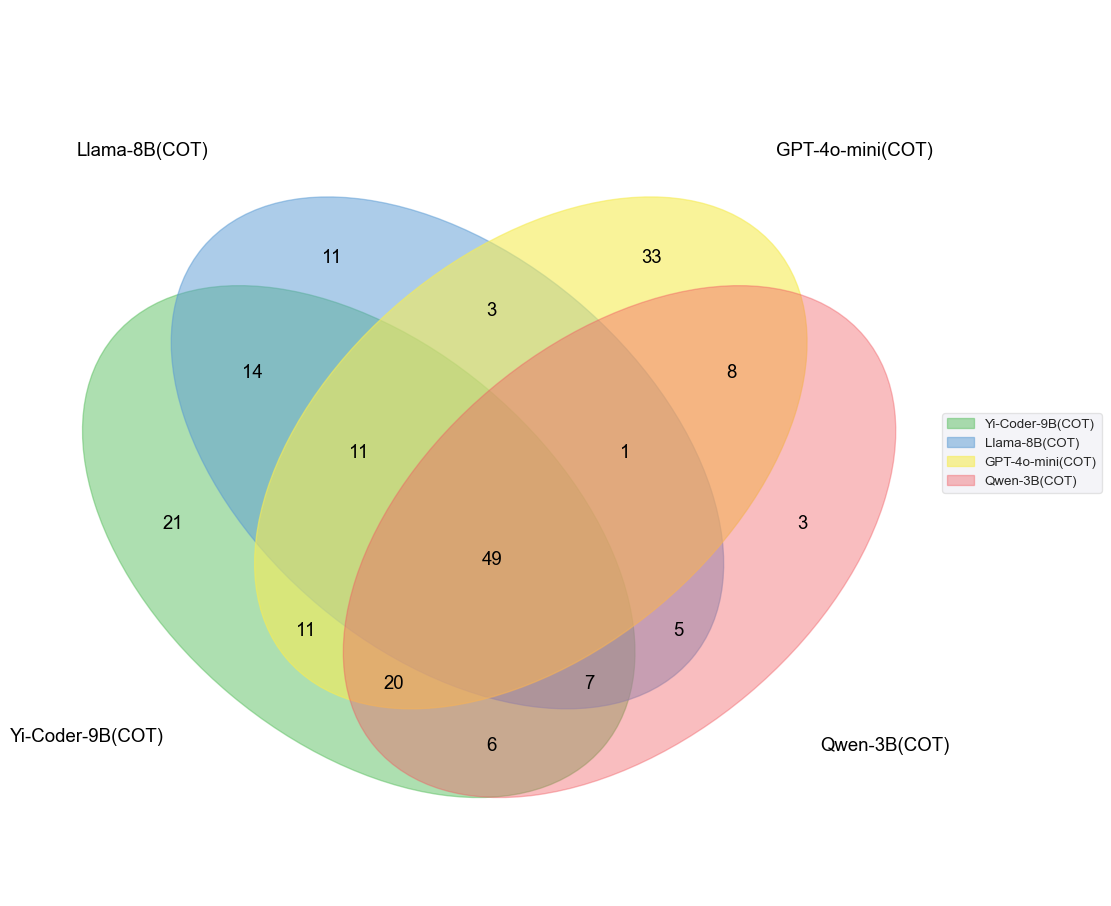

In [9]:
cot_llama_8b=read_pass_result_from_manual_file("./manual_cot_llama_8b.txt")
cot_gpt4o_mini=read_pass_result_from_manual_file("./manual_cot_gpt4o_mini.txt")
cot_qwen_3b=read_pass_result_from_manual_file("./manual_cot_qwen_3b.txt")
print(len(cot_yi),len(cot_llama_8b),len(cot_gpt4o_mini),len(cot_qwen_3b))
intersections=calculate_intersections([
    cot_yi,
    cot_llama_8b,
    cot_gpt4o_mini,
    cot_qwen_3b
])
intersections={k:len(v) for k,v in intersections.items()}
venn4(intersections,names=['Yi-Coder-9B(COT)','Llama-8B(COT)','GPT-4o-mini(COT)','Qwen-3B(COT)'],output="./pdf/cot_venn4")
##%%

In [53]:

import json

def get_avg_rollout(fpath,k=16):
    num=0
    rollout=0
    with open(fpath,'r') as f:
        for line in f.readlines():
            json_line=json.loads(line)
            if json_line['eval']=='PASS' :
                
                if "attempt" in json_line and json_line['attempt']<=k:
                    rollout+=json_line['attempt']
                    num+=1
                elif "rollout" in json_line and json_line['rollout']<=k:
                    rollout+=json_line['rollout']
                    num+=1
    return rollout/num
result1,result2=[],[]
for k in range(2,17):
    result1.append(get_avg_rollout("./mcts_yi_9b_16_rollout.jsonl",k))
    result2.append(get_avg_rollout("./result_yi.jsonl",k))
print(' & '.join([str(round(x,3)) for x in result1]))
print(' & '.join([str(round(x,3)) for x in result2]))
    
    
##%%

1.33 & 1.694 & 1.957 & 2.179 & 2.277 & 2.509 & 2.704 & 2.885 & 2.966 & 3.056 & 3.253 & 3.411 & 3.524 & 3.585 & 3.78
1.289 & 1.574 & 1.741 & 2.047 & 2.307 & 2.407 & 2.673 & 2.8 & 2.987 & 2.987 & 3.159 & 3.283 & 3.35 & 3.703 & 3.777


In [25]:
mapping={}
with open("./result_phi.jsonl") as f:
    for line in f.readlines():
        json_line=json.loads(line)
        mapping[json_line['project']+"_"+str(json_line['bug_id'])]=json_line['mode']
            
def get_type(project,bug_id):
   return mapping.get(project+"_"+str(bug_id),"UNKNOWN")

def read_manual(fpath,is_plausible=True):
    sl,sh,sf=[],[],[]
    with open(fpath) as f:
        for line in f.readlines():
            t=line.split(",")[0].strip()
            project=t.split("_")[0]
            bug_id=t.split("_")[1]
            if not is_plausible and  line.split(",")[1].strip()=="False":
                continue
            if get_type(project,bug_id)=="SL":
                sl.append(line)
            elif get_type(project,bug_id)=="SH":
                sh.append(line)
            elif get_type(project,bug_id)=="SF":
                sf.append(line)
    return sl,sh,sf

sl,sh,sf=read_manual("./manual_mcts_gpt4o_mini.txt")
print(len(sl),len(sh),len(sf))
            
        

92 45 71
